# Identifying mechanisms of *Mycobacterium tuberculosis* inhibitors

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Aims" data-toc-modified-id="Aims-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aims</a></span></li></ul></li><li><span><a href="#Experimental-setup" data-toc-modified-id="Experimental-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experimental setup</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Antibiotics-dataset" data-toc-modified-id="Antibiotics-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Antibiotics dataset</a></span></li><li><span><a href="#Strains-dataset" data-toc-modified-id="Strains-dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Strains dataset</a></span></li><li><span><a href="#Counts-dataset" data-toc-modified-id="Counts-dataset-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Counts dataset</a></span></li></ul></li><li><span><a href="#Wild-type-strain-data-exploration" data-toc-modified-id="Wild-type-strain-data-exploration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wild type strain data exploration</a></span><ul class="toc-item"><li><span><a href="#Dose-response-curves" data-toc-modified-id="Dose-response-curves-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dose response curves</a></span></li><li><span><a href="#Estimating-logIC50" data-toc-modified-id="Estimating-logIC50-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Estimating logIC50</a></span></li><li><span><a href="#Exploring-relationship-between-structure-and-activity" data-toc-modified-id="Exploring-relationship-between-structure-and-activity-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Exploring relationship between structure and activity</a></span></li><li><span><a href="#UMAP-of-chemical-structure" data-toc-modified-id="UMAP-of-chemical-structure-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>UMAP of chemical structure</a></span></li><li><span><a href="#Note-on-morgan-fingerprints" data-toc-modified-id="Note-on-morgan-fingerprints-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Note on morgan fingerprints</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Visualisation</a></span></li></ul></li><li><span><a href="#Exploring-mechanisms-of-action" data-toc-modified-id="Exploring-mechanisms-of-action-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploring mechanisms of action</a></span><ul class="toc-item"><li><span><a href="#Calculating-logIC50s-for-all-strains" data-toc-modified-id="Calculating-logIC50s-for-all-strains-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Calculating logIC50s for all strains</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Adding-biological-target-information" data-toc-modified-id="Adding-biological-target-information-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Adding biological target information</a></span></li><li><span><a href="#UMAP-of-mechanism-of-action" data-toc-modified-id="UMAP-of-mechanism-of-action-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>UMAP of mechanism of action</a></span></li><li><span><a href="#Correlation-between-structure-and-mechanism" data-toc-modified-id="Correlation-between-structure-and-mechanism-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Correlation between structure and mechanism</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Introduction

This project was supervised by Dr Eachan Johnson at the Francis Crick Institute.

### Background

Tuberculosis (TB) is an infectious disease caused by *Mycobacterium tuberculosis* and is one of the top ten causes of death worldwide. Although TB is normally treated with a combination of first-line antibiotics, such as rifampicin and isoniazid, 3.5% of new TB cases will exhibit resistance to these drugs. The spread of this multi-drug resistant TB is deeply concerning as the treatment for it is expensive, less effective and can have life-threatening side effects. Furthermore, multi-drug resistant TB strains can acquire resistance to second-line drugs, further limiting treatment options. 

### Aims

Safer and more effective treatments for multi-drug resistant TB are urgently needed. In this study, we investigated a wide range of compounds with known activity against *M. tuberculosis*, including several first- and second-line TB drugs. Since the biological targets of many of these compounds are unknown, the two main aims of this study were to:
1. Predict mechanisms of action for all compounds. 
2. Explore relationship between chemical structure and biological target/mechanism of action.

Exploring the mechanisms of these compounds could lead to a better understanding of how existing TB drugs work and how antibiotic resistance evolves in *M. tuberculosis*. This would facilitate the discovery of compounds with novel mechanisms that may be more effective against multi-drug resistant TB. Future work will involve developing a machine learning model that can predict the mechanism and potency of a compound given it chemical structure.

## Experimental setup

In order to investigate the mechanisms of action of the compounds, each compound was tested on pools of *M. tuberculosis* strains with diminished production of essential genes. These strains, known as hypomorphs, were constructed by inserting a DAS tag, which targets proteins for degradation, at the 3' end of the target gene. A unique sequence of nucleotides known as a barcode was also inserted to enable individual strains to be identified and counted when pooled with other hypomorphs. In this study, 402 hypomorphs were created and separated into two pools. Each compound was then tested separately on both pools and at various doses. After incubating the pools with the compounds, the number of live cells of each hypomorph still present in the pool was determined by using polymerase chain reaction (PCR) to amplify the barcodes and next generation sequencing to identify and count them. 

![title](picture.png)

**Fig 1:** Flow chart showing hypomorph construction and assay design. Figure taken from Eachan *et al.* (2020).

## Import libraries

In [1]:
import sigmoid2    # Module containing custom functions for data visualisation and IC50 calculations

import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px

from imp import reload
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings("ignore")

## Data cleaning

There are three datasets:
1. Antibiotics dataset - contains information on the compounds tested such as name, chemical structure in SMILES format, biological target (if known) and molecular weight.
2. Strains dataset - names of the strains of <i>M. tuberculosis</i> that were tested and the pools they belonged to (either pool A, pool B or both pools)
3. Counts dataset - the bacterial counts for a given strain at different concentrations of a specific compound. All compounds were tested on both strain pool A and B.

### Antibiotics dataset

1114 compounds with known activity against *M. tuberculosis* were selected. The variety of compounds range from existing tuberculosis drugs, such as fluoroquinones, to natural products derived from plants.

In [2]:
antibiotics = pd.read_csv('kabx_compound.sanitized.csv')
antibiotics = antibiotics.drop_duplicates(subset=['pert_id'])

In [4]:
targets = antibiotics['pert_gene_target'].value_counts()

print(f'No. of compounds: {antibiotics.shape[0]}')
print(f'Compounds with unknown target: {targets[0]}')
print(f'Top targets: {targets[1:5].index.values}')

No. of compounds: 1114
Compounds with unknown target: 645
Top targets: ['inhA' 'fadD32' 'gyrAB' 'gyrA']


### Strains dataset

In [ ]:
strains = pd.read_csv('strain-batches.csv')
strainA = set((strains.loc[strains['strain_set']=='A']['strain'].values))
strainB = set((strains.loc[strains['strain_set']=='B']['strain'].values))
both = strainA.intersection(strainB)

A_dict = dict.fromkeys(strainA - both, ['A'])
B_dict = dict.fromkeys(strainB - both, ['B'])
both_dict = dict.fromkeys(strainA.intersection(strainB), ['A','B']) #Strains that are present in both sets of ≈ 200

all_strains = {**A_dict, **B_dict, **both_dict}

strain_names = list(all_strains.keys())

In [150]:
print(f'Number of strains tested: {len(strain_names)}')

Number of strains tested: 402


### Counts dataset

In [ ]:
counts = pd.read_csv('kabx_counts.sanitized.csv')

keep_cols = ['pert_id', 'plate_pool', 'pert_dose', 'strain_name', 'is_control', 'predicted_null_count', 
             'count', 'strain_set']
new_df = counts[keep_cols]
new_df['count'] = np.log2(new_df['count'] + 1)
new_df['predicted_null_count'] = np.log2(new_df['predicted_null_count'] + 1)
new_df['log_dose'] = np.log10(new_df['pert_dose']+0.0000001)

for s in strain_names:
    s_set = all_strains[s]
    filt = (new_df['strain_name'] == s) & (~ new_df['strain_set'].isin(s_set))
    new_df = new_df.drop(new_df[filt].index)

new_df.to_csv('counts.csv',index=False)

In [3]:
cleaned_counts = pd.read_csv('counts.csv')
cleaned_counts.head()

,pert_id,plate_pool,pert_dose,strain_name,is_control,predicted_null_count,count,strain_set,log_dose
0,DMSO,pool_3,0.00,accA2,0,7.874288,8.290019,B,-7.00000
1,BRD-U00005160,pool_3,50.00,accA2,0,7.874288,6.954196,B,1.69897
2,BRD-U00005160,pool_3,25.00,accA2,0,7.874288,6.754888,B,1.39794
3,BRD-U00005160,pool_3,12.50,accA2,0,7.874288,8.455327,B,1.09691
4,BRD-U00005160,pool_3,6.25,accA2,0,7.874288,8.353147,B,0.79588


## Wild type strain data exploration

In [212]:
import matplotlib as mpl
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

### Dose response curves

Several wild type strains were included in this assay to act as controls. Plotting the dose response curves for two of the compounds tested on the wild type strain H37RvBC07 reveals significant variability in the counts between different plates. However, taking the average of the bacterial counts across plates smoothes out the variability, allowing us to see that the relationship between the compound concentration and bacterial counts is sigmoidal.

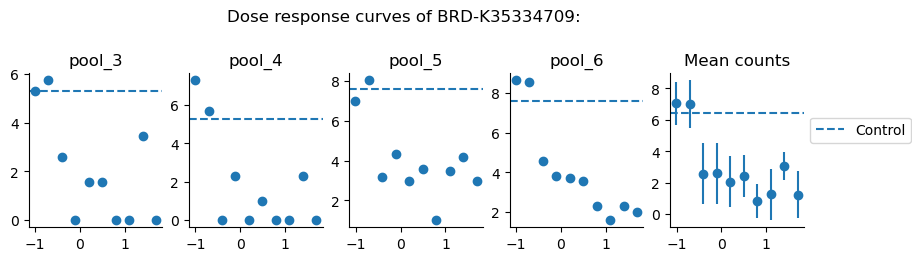

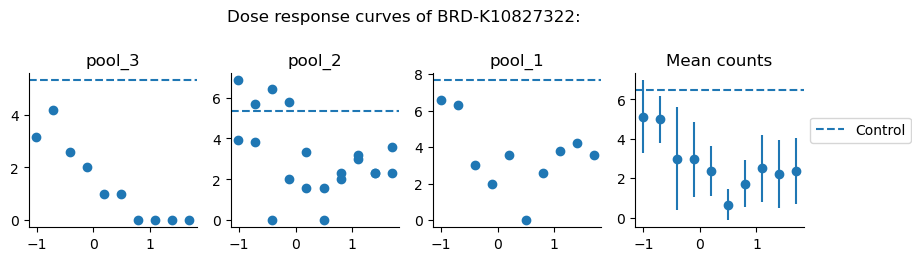

In [260]:
counts_WT = sigmoid2.subset(cleaned_counts,'H37RvBC07') # Subset data to show bacterial counts for wild type strains
# Plot dose response curves for two compounds for each plate and the plate average:
plot_plates(counts_WT, 2, [], size = (10,2))  

**Fig 2:** Dose response curves for two randomly selected compounds, with log10(concentration) on the x axis and log2(bacterial count) on the y axis. Curves are shown for each repeat (titled pool_x) and the average of all repeats (titled Mean counts).

### Estimating logIC50

To compare the level of inhibition of different compounds, a four parameter logistic regression model was fit to the dose response data for each compound and the half maximal inhibitory concentration $IC_{50}$ estimated. The equation below describes the logistic model, where $b$ is the Hill slope, $c$ the minimum response, $d$ the maximum response and $e$ is the $IC_{50}$:

\begin{equation}
f(x) = c + \frac{d-c}{1+exp(b(log(x)-log(e))}
\end{equation}

Due to the high level of noise present in the raw data, additional points were added to the extreme ends of the curves  in order to expedite the curve-fitting algorithm. 

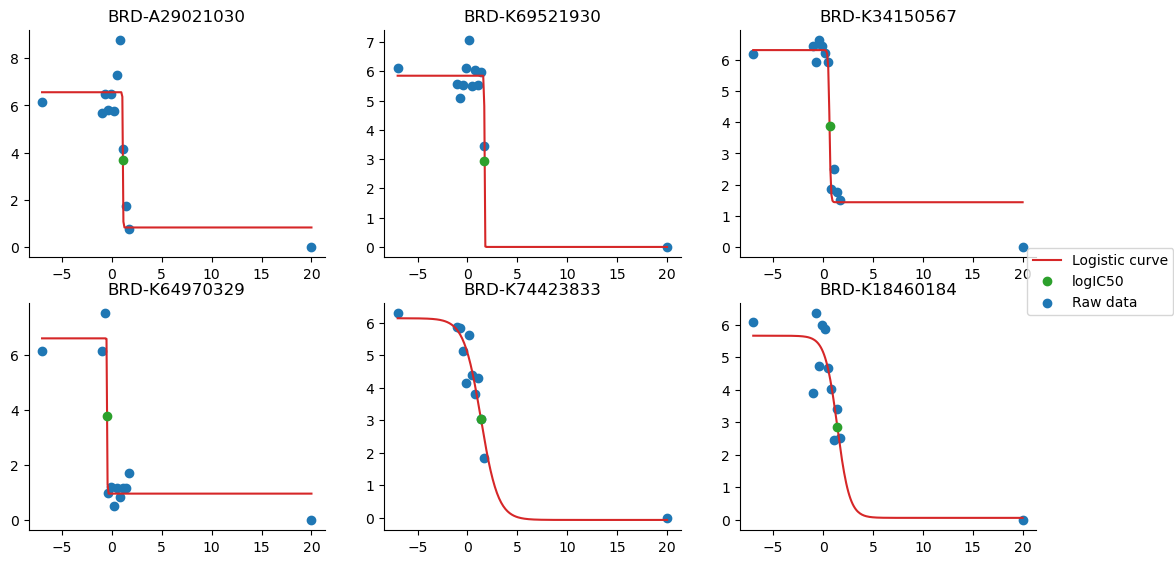

In [299]:
logIC50_WT, no_fit, type_err = sigmoid2.ic50(True, counts_WT) 

**Fig 3:** Dose response curves, with log10(concentration) on the x axis and log2(bacterial count) on the y axis. Raw average bacterial counts are shown in blue and the fitted logistic curve in red. The logIC50 is shown in green. 

### Exploring relationship between structure and activity 

One of the tools used to aid the design of drugs is Lipinski's rule of five, which suggests that an active drug will fulfill at least three of the following criteria:

- No more than five hydrogen bond donors 
- No more than ten hydrogen bond acceptors 
- Molecular mass less than 500 Da
- logP less than five - logP describes the solubility of a compound in water versus an organic solvent.

It is important to note that the 'rule' of five is not a strict rule, but an empirical observation of drugs; PROTACS for instance have a molecular weight in the range of 700 to 1000 Da but are still good drugs. This is supported by the boxplots below, which indicate that whilst most of the active compounds do indeed fulfill the rule of five, several compounds significantly exceed the maximum molecular mass and number of hydrogen donors and acceptors.

In [371]:
col_names = ['pert_id','pert_calc_mw','pert_calc_logp', 'pert_calc_n_hbond_acceptors', 'pert_calc_n_hbond_donors']
logIC50_WT_prts = pd.merge(logIC50_WT, antibiotics[col_names], how = 'inner', on = 'pert_id')
# Assume that compounds with a logIC50 greater than 0 are not active
logIC50_WT_prts = logIC50_WT_prts[logIC50_WT_prts['log_IC50'] < 1] 
logIC50_WT_prts.head()

,pert_id,log_IC50,pert_calc_mw,pert_calc_logp,pert_calc_n_hbond_acceptors,pert_calc_n_hbond_donors
2,BRD-K34150567,0.647394,301.121512,3.89730,4,4
3,BRD-K64970329,-0.469914,402.055339,3.54300,7,7
7,BRD-K01507359,-2.538481,822.405123,4.33542,16,16
14,BRD-K41646294,0.222837,430.076947,2.47830,8,8
16,BRD-K32012562,0.366305,349.132745,4.54450,5,5


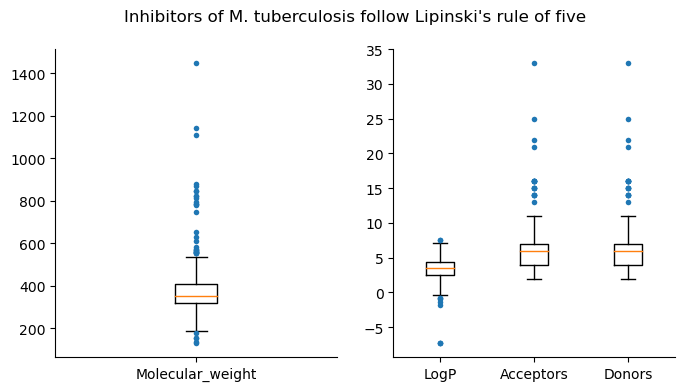

In [391]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4), squeeze = False, dpi = 100)
flierprops = dict(marker='o', markersize=4, markeredgecolor='none', markerfacecolor='tab:blue')

ax[0][0].boxplot(logIC50_WT_prts['pert_calc_mw'], labels=['Molecular_weight'], flierprops=flierprops)
ax[0][1].boxplot(logIC50_WT_prts.iloc[:, 3:], labels=['LogP', 'Acceptors', 'Donors'], flierprops=flierprops)
fig.suptitle("Inhibitors of M. tuberculosis follow Lipinski's rule of five")
plt.show()

**Fig 4:** Boxplots showing distributions of various properties of all the compounds in the dataset.

This is further supported by the correlation coefficients which show a weak, positive correlation between the logIC50 (measure of activity) and the molecular weight and number of hydrogen bond acceptors and donors of a compound. Interestingly, there is no significant correlation between the logIC50 and the logP.

In [361]:
corrs = logIC50_WT_prts.iloc[:,1:].corr()
corrs['log_IC50'][1:]

pert_calc_mw                  -0.326380
pert_calc_logp                -0.055148
pert_calc_n_hbond_acceptors   -0.355052
pert_calc_n_hbond_donors      -0.355052
Name: log_IC50, dtype: float64

### UMAP of chemical structure

To further investigate the relationship between the chemical structures of the compounds and their potencies, the SMILES strings of the compounds were converted to 1024 bit vectors known as Morgan fingerprints. These fingerprints were visualised by projecting them onto a two dimensional space using a dimensionality reduction technique called Uniform Manifold Approximation and Projection (UMAP).

### Note on morgan fingerprints

Each bit position in a Morgan fingerprint corresponds to a type of substructure, where 1 indicates the substructure is present and 0 otherwise. Occasionally, different substructures can be mapped to the same bit position, which is known as 'bit collision' - this is why it is important to specifiy a sufficiently large enough size for the bit vectors. Morgan fingerprints describe the atom environment for each heavy atom (i.e. any atom that is not hydrogen) in a compound - Figure 5 demonstrates how the surrounding atom environment within a bond radius of 4 can be described for a single heavy atom in a compound.

<img src="morgan.png" width="400">

**Fig 5:** 9 bit Morgan fingerprint vector with a bond radius of 4 for the central carbon atom in a compound.

In [14]:
# Create Morgan fingerprints of the compounds and train the UMAP on these
fingerprints = sigmoid2.fps(antibiotics)
    
reducer = umap.UMAP(n_neighbors=15, min_dist = 0.1, metric = 'jaccard') 
compound_umap = reducer.fit_transform(fingerprints)

### Visualisation

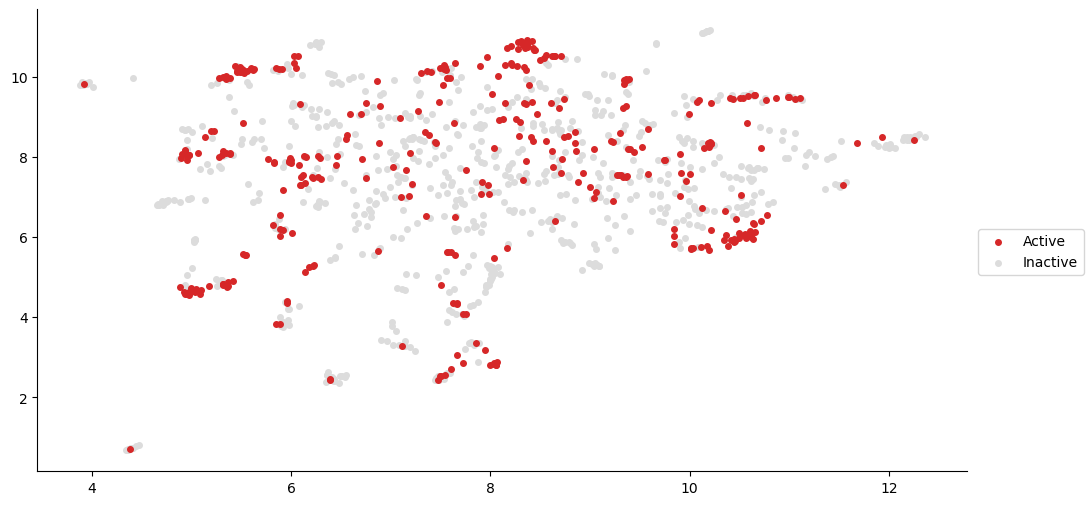

In [525]:
# Visualise the UMAP and colour compounds according to their potency.
potent_WT = sigmoid2.potent(antibiotics,logIC50_WT, 1)
active = [compound in potent_WT['pert_id'].tolist() for compound in antibiotic_ls]
not_active = [not compound in potent_WT['pert_id'].tolist() for compound in antibiotic_ls]

a_umap = compound_umap[active,:]
b_umap = compound_umap[not_active,:]

fig, ax = plt.subplots(1, 1, figsize= (12,6), squeeze = False)
ax[0][0].scatter(x=a_umap[:,0], y=a_umap[:,1], s = 16, color = 'tab:red', zorder=2)
ax[0][0].scatter(x=b_umap[:,0], y=b_umap[:,1], s = 16,color = 'gainsboro', zorder=1)
fig.legend(loc='center right', labels = ['Active','Inactive'])
plt.show()

**Fig 6:** Two dimensional representation of the Morgan fingerprints of all 1114 compounds.

Although the UMAP is able to identify groups such as the fluoroquinones and rifampicin-like molecules (not shown here), there does not seem to be a significant correlation between chemical structure and activity. This could be because the compounds have too many diverse mechanisms of action and there are not enough representative compounds for each type of mechanism.

## Exploring mechanisms of action

### Calculating logIC50s for all strains

In order to investigate the mechanisms of action of all the compounds, their activity across different strains was compared. To facilitate this, the logIC50 for every antibiotic and strain combination was calculated.

In [ ]:
all_strains_IC50 = pd.DataFrame()
all_strains_IC50['pert_id'] = antibiotics['pert_id'].unique()

for s in strain_names[77:]:
    no_info = []
    try:
        logIC50_strain = sigmoid2.strain_IC50(s)
        logIC50_strain.columns = ['pert_id', s]
        all_strains_IC50 = all_strains_IC50.merge(logIC50_strain, how = 'left', on='pert_id')
    except IndexError:
        no_info.append(s)

In [122]:
all_strains_IC50 = all_strains_IC50.drop([0,194])
all_strains_IC50.to_csv('all_strains_IC50.csv', index=False)

The `pert_id` column contains the unique ID for each compound tested. The remaining column headings e.g. `Rv2554c`, `mmpL3` etc. are the names of the hypomorph strains.

In section 6.4, I use the rows of this dataset to construct a UMAP.

In [19]:
# Rename dataset from 'all_strains_IC50' to 'strains'
strains = pd.read_csv('all_strains_IC50.csv')
strains.head()

,pert_id,Rv2554c,mmpL3,hemE,gnd2,aftD,rpoA,Rv1490,fabD,Rv0697,ctaD,fusA1,mmpL12,rpmC,qcrA,mmpL9,rplJ,PE5,pra,rne,rplM,grpE,ppk1,dfp,dprE1,clpX,atpF,Rv1462,pks13,entC,Rv3587c,Rv2698,secF,hisD,trpE,Rv3579c,Rv1465,Rv0248c,lppZ,argJ,Rv3031,Rv1342c,rplW,rplC,Rv2581c,PPE4,ppnK,Rv2172c,Rv1476,aroE,leuD,ligA,pknA,Rv3208,thrB,Rv2047c,Rv3604c,obgE,Rv2509,thiC,argD,rplE,Rv0292,Rv3722c,mptA,Rv3645,Rv1111c,rfbE,csd,Rv0204c,miaA,prrB,rplD,Rv0817c,Rv0647c,rpoZ,ligD,TB39.8,Rv2980,Rv0228,panB,Rv2673,carB,rnc,fixB,Rv0504c,pirG,Rv2413c,Rv1254,Rv1201c,atpB,menC,Rv2971,wag31,Rv3778c,glpD2,cmk,acpP,Rv1463,fdxC,Rv0226c,aftA,Rv0479c,Rv2182c,tyrA,Rv3210c,pheS,Rv0455c,lipB,pks7,Rv1683,nadC,rplY,thrC,rplV,Rv1348,rpmA,TB18.5,Rv1697,gcvT,tkt,rplK,atpA,cysT,fadE19,trpD,lprD,Rv3222c,ribG,hemK,Rv0364,gltS,atpH,pgsA2,ispD,whiB1,pheA,Rv0347,purK,H37RvBC02,adk,Rv2050,Rv0913c,ndh,Rv2228c,lepB,pimA,Rv1382,Rv3635,Rv0023,Rv0373c,fadD7,Rv1576c,zmp1,hadB,thiG,trpB,aroB,birA,efp,Rv3909,folP1,Rv1828,Rv0431,thiE,orn,lexA,Rv3030,gpgS,qcrC,argB,rpe,mapB,mtrA,pabB,Rv3038c,hisB,Rv3281,ilvB1,atpG,trxB2,glf,mycP5,Rv0787A,menB,rfe,Rv3922c,Rv0528,hisC1,panD,menA,esxG,rpsC,pyrC,Rv0225,nadB,Rv1457c,Rv0412c,Rv1044,coaE,rplP,folD,Rv2455c,Rv0224c,lppL,oxcA,echA17,panC,pmmA,argF,cyp135A1,Rv2454c,rpsE,rplU,thiD,secD,dnaG,Rv2611c,leuC,thiO,qcrB,Rv1456c,mtrB,hisF,rpsQ,Rv2242,mmpS3,hisA,parB,alaS,Rv0284,rocA,proB,Rv2190c,trmD,fmt,nadE,ccsX,mdh,cysS1,nusA,argG,manB,hemA,grcC1,murG,dapE,folB,cstA,gatA,Rv3644c,menD,hisI,argC,Rv0260c,Rv0811,Rv2235,nrdF2,desA1,mmpL2,ppm1,fba,accA2,trpA,leuA,aspB,ftsK,purL,Rv2017,Rv1783,hemL,Rv0283,otsA,Rv0282,dnaN,leuB,tpi,accD2,rpsM,hsdM,otsB1,lysA,Rv3267,Rv0526,ctaC,glmU,dfrA-FLAG,topA,menH,canB,ndhA,metA,mesJ,hemZ,kasA,prfA,purM,menE,fum,aroG,ftsW,dapF,sucC,Rv1339,infB,Rv0525,gltB,murA,gcvB,guaB2,eno,gatB,Rv0338c,murD,iscS,pcnA,gcvH,ilvC,dapB,gpsI,murC,mycP3,Rv2507,Rv3719,thyA,lipU,desA2,proS,fas,manA,proC,aroF,trpS,aspS,dxr,secY,adoK,dnaE1,parA,pstP,pyrH,Rv1836c,leuS,gca,hemY,Rv0289,lipA,tyrS,wbbl2,metS,kasB,metE,aceE,hemB,ino1,gap,moxR1,pyrB,def,gpm1,fadD30,Rv1797,asnB,hemC,acn,marP,mprB,purD,Rv2747,glgB,Lysis-control,fadD32,H37RvBC08,alr-FLAG,glcB,prcBA,H37RvBC17,trpG,gyrB,aspC,icd2,atpDC,H37RvBC14,mshC,H37RvBC07,rpoB,dnaK,embC,efpA,gyrA,nrdH,H37RvBC15,H37RvBC16,PCR-control,H37RvBC06,H37RvBC09
0,BRD-A29021030,1.957563,2.016120,3.149898,2.228426,1.911945,2.291521,1.868032,2.053111,1.852470,1.336736,1.912916,2.106176,2.044236,1.113532,1.869262,-242.700416,1.729488,1.941744,1.332329,2.450714,2.219372,3.307505,1.896633,2.034131,1.606906,-0.321018,1.456830,1.525445,2.230255,2.083952,1.938443,2.237157,1.956582,2.229454,2.349635,1.534279,2.168706,1.778297,1.719115,1.983261,1.693131,1.974983,2.155114,2.063880,1.833318,1.845773,1.521827,1.990189,2.602283,4.118754,2.519810,1.532203,1.955342,2.144942,1.853929,1.863812,2.167609,2.103662,1.879024,1.464776,2.812435,1.765537,1.108995,1.669002,2.043196,1.894402,1.612727,1.946236,1.980787,2.016488,2.003336,2.110417,1.923425,279.643086,1.677758,1.980007,2.455515,1.770419,1.882899,1.662837,1.926230,2.654838,1.580479,1.991597,1.939126,1.772342,1.475565,1.914227,1.641053,1.894697,1.633057,1.967148,1.865691,1.509747,1.941542,2.054246,3.100891,1.969618,1.680849,1.729337,2.093513,1.827522,2.564121,1.647722,2.235066,1.212785,1.840406,1.896341,1.711873,2.022029,1.854003,1.948205,1.948529,1.938800,2.240613,1.924273,2.148455,2.176482,2.182927,7.347137,1.928766,1.376854,1.988338,1.818691,1.602083,1.722179,1.891863,1.764532,1.862611,1.606438,1.677131,1.971345,1.925757,1.956184,1.788795,2.035006,1.937413,2.169662,1.072360,1.998380,1.606226,1.861374,1.967011,2.075857,1.811545,1.957841,1.668067,1.911033,1.571651,1.535261,1.931949,2.092432,1.998002,1.932886,2.443562,1.782991,2.260183,1.955534,NaN,2.241066,1.917974,1.731238,2.002553,3.694636,1.906809,4.744551,1.939148,1.781620,1.901938,1.924897,2.189270,2.016358,1.569205,2.044247,1.682442,1.694121,2.123911,2.015645,2.013211,2.097934,2.217208,2.094059,1.773307,2.546807,1.654423,2.040379,2

### Data preparation 

In [21]:
# Replace any missing values with a large positive logIC50
strains = strains.fillna(20)

# Computed the average logIC50 for all the wild type strains and subtracted this average from all the other logIC50s
wild_strains = []
for i in strains.columns:
    if re.search("H37RvBC", i):
        wild_strains.append(i)

WT_avg = strains[wild_strains].mean(axis=1).values

strains_control = strains.iloc[:,1:].sub(WT_avg, axis=0)

### Adding biological target information

Since proteins often have several alternative names, I used webscraping to map the names of the biological target in the `antibiotics` dataset to unique Uniprot identifiers. Uniprot is a freely accessible database of proteins that contains information on their sequence, function and structures. Using these Uniprot identifiers, I then used the Uniprot API to get the correct scientific names of these targets.

In [ ]:
# Convert protein target name in antibiotics dataset to Uniprot ID using web scraping
known_targets = antibiotics['pert_gene_target'].value_counts()[1:]
known_targets_clean = []

for t in list(known_targets.index):
    for i in t.split('|'):
        known_targets_clean.append(i)

target_id = {}
no_target = []

for t in known_targets_clean:
    url = 'https://www.uniprot.org/uniprot/?query=' + t + '+myctu&sort=score'
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'html.parser')
    try:
        ID = soup.tbody.find("tr").get('id')
        target_id[t] = ID
    except AttributeError:
        no_target.append(t)
        
#manually enter Uniprot identifiers for targets in no_target list
target_id['gyrAB']='P9WG47'
target_id['thyAX']='P9WFR9'
target_id['nrdFH']='P9WH71'
target_id['clpXP']='P9WPB9'
target_id['pknABG']='P9WI83'
target_id['atpDC']='P9WPU5'
target_id['parA']='Q1LVD4'

In [18]:
def target_to_id(string):
    if string in target_id.keys():
        return target_id[string]
    else:
        return 'unknown target'
target_id = {'inhA': 'P9WGR1', 'fadD32': 'O53580', 'gyrA': 'P9WG47', 'prcBA': 'P9WHT9', 'folP1': 'P9WND1', 'pbpA': 'P9WKD1', 'topA': 'P9WG49', 'mmpL3': 'P9WJV5', 'alr': 'P9WQA9', 'dfrA': 'P9WNX1', 'mbtI': 'P9WFX1', 'dprE1': 'P9WJF1', 'infB': 'P9WKK1', 'prrB': 'P9WGK7', 'glf': 'P9WIQ1', 'gyrB': 'P9WG45', 'panC': 'P9WIL5', 'accD6': 'P9WQH5', 'ethR': 'P9WMC1', 'guaB2': 'P9WKI7', 'pks13': 'I6X8D2', 'lipY': 'I6Y2J4', 'rpoB': 'P9WGY9', 'qcrB': 'P9WP37', 'aroK': 'P9WPY3', 'blaC': 'P9WKD3', 'fas': 'P9WGR1', 'canA': 'P9WPJ7', 'kasA': 'P9WQD9', 'pptT': 'O33336', 'glmU': 'P9WMN3', 'leuS': 'P9WFV1', 'rpsA': 'P9WH43', 'parA': 'Q1LVD4', 'mshC': 'P9WJM9', 'pyrG': 'P9WHK7', 'ndh': 'P9WIV9', 'ftsZ': 'P9WN95', 'trxB2': 'P9WHH1', 'mprB': 'P9WGL1', 'qcrA': 'P9WH23', 'murI': 'P9WPW9', 'pknB': 'P9WI81', 'trpA': 'P9WFY1', 'add': 'P9WJ93', 'ileS': 'P9WFV3', 'mdh': 'P9WK13', 'trxC': 'P9WQB7', 'cysH': 'P9WIK3', 'glgB': 'P9WN45', 'purE': 'P9WHM1', 'cyp121': 'P9WPP7', 'embC': 'P9WNL5', 'serB2': 'O53289', 'murA': 'P9WJM1', 'murG': 'P9WJK9', 'ponA': 'P71707', 'ddlA': 'P9WP31', 'fusA': 'P9WNM7', 'deoD': 'P9WP01', 'mtr': 'P9WHH3', 'polA': 'P9WG47', 'menG': 'P9WKI9', 'fba': 'P9WQA3', 'metAP': 'P9WK21', 'dxr': 'P9WNS1', 'gyrAB': 'P9WG47', 'thyAX': 'P9WFR9', 'nrdFH': 'P9WH71', 'clpXP': 'P9WPB9', 'pknABG': 'P9WI83', 'atpDC': 'P9WPU5'}

In [19]:
# Extract scientific name using Uniprot API
uniprot = pd.read_csv('uniprot.csv')
id2name = dict(zip(uniprot.Entry, uniprot['Entry name']))

# Add name of biological target to strains dataset
antibiotics['pert_gene_target_id'] = antibiotics['pert_gene_target'].apply(target_to_id)
strains = strains.merge(antibiotics[['pert_id', 'pert_gene_target_id']], on='pert_id', how = 'left')
strains['pert_gene_target_id'] = strains['pert_gene_target_id'].map(id2name).fillna('unknown target')

In [25]:
strains.to_csv('cleaned_strains.csv', index=False)

In [24]:
strains = pd.read_csv('cleaned_strains.csv')

### UMAP of mechanism of action

To explore the mechanisms of action, I converted each row in the `strains` dataset to an array and used it to construct a UMAP. This is because we would expect compounds with similar mechanisms of action to have similar row vectors.

In [136]:
# Convert each row in the strains dataset to an array and use this to construct the UMAP
vectors_control = strains_control.values

reducer = umap.UMAP(metric = 'euclidean')
control_umap = reducer.fit_transform(vectors_control)

In [25]:
groups = strains.groupby('pert_gene_target_id').indices 

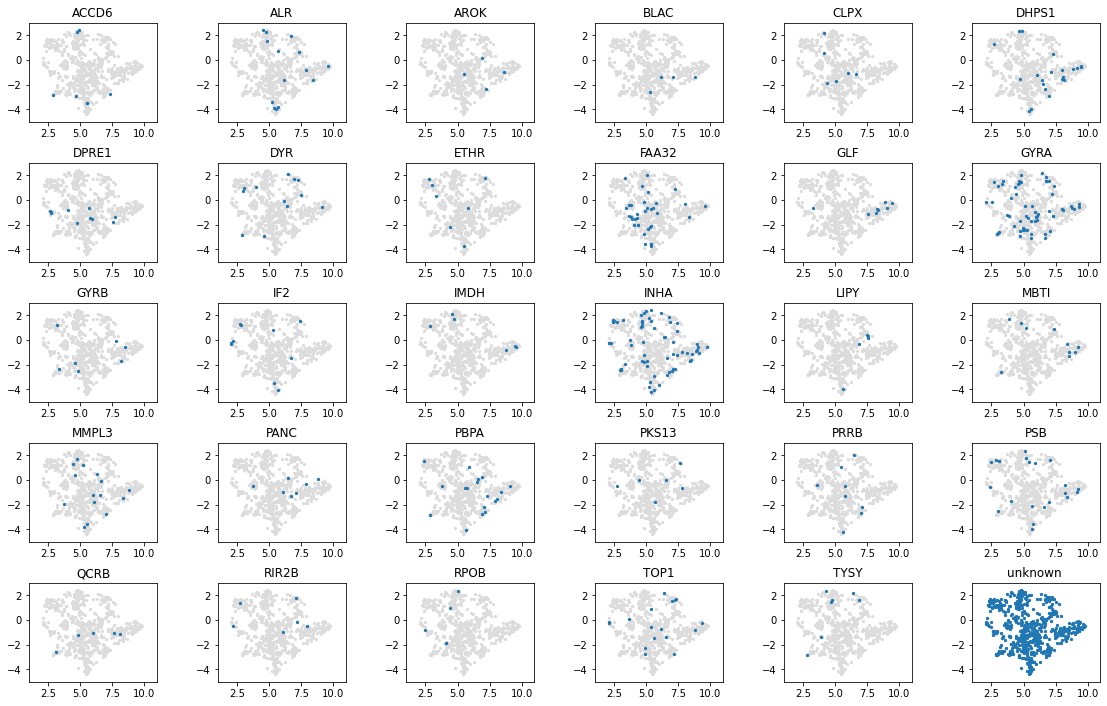

In [41]:
cols=6
fig, ax = plt.subplots(nrows=5, ncols=cols, figsize=(16,10))
fig.tight_layout(pad=2)
r,c = 0,0
for group, i in groups.items():
    unknown = groups['unknown target']
    if len(i) > 3:
        ax[r][c].scatter(x=control_umap[i,0], y=control_umap[i,1], s =5,zorder=2)
        ax[r][c].scatter(x=control_umap[unknown,0], y=control_umap[unknown,1], s =5, color='gainsboro',zorder=1)
        ax[r][c].set_title(group[0:-6])
        ax[r][c].set_xlim([1, 11])
        ax[r][c].set_ylim([-5, 3])
        c += 1  
        if c%cols==0:
            r += 1
            c = 0
plt.show()

**Fig 7:** Two dimensional representation of the row vectors from the `strains` dataset. Each subplot shows the compounds known to target a specified *M. tuberculosis* host protein. The subplot entitled 'unknown' shows all the compounds for which their biological target is unknown.

From the UMAPs above, we can observe a single cluster for certain proteins such as BLAC, LIPY and GLF, suggesting that the compounds that target these proteins share a common mechanism of action. Other targets such as ACCD6 and FAA32 have two or more clusters, suggesting that the these proteins can be inhibited by more than one mechanism of action. On the other end of the spectrum, the UMAPs for some targets, such as INHA and GYRA, show no sign of clustering. One possible explanation for this is these targets are inhibited by several different mechanisms of action. Alternatively, the clustering in the UMAPs of other targets could be an artefact of low sample sizes and therefore, INHA and GYRA, which are known targets of a much larger number of compounds, show no evidence of clustering.

### Correlation between structure and mechanism

Calculating the correlation between a compound's position on the UMAP above and its Morgan fingerprint seems to suggests that there is indeed a weak correlation between the two, even for targets such as GYRB, which do not show significant clustering in the UMAP.

In [155]:
mols = strains[strains['pert_gene_target_id']=='GYRB_MYCTU']
mechanism_umap = control_umap[mols.index]

mols_fps = sigmoid2.fps(antibiotics, mols)
reducer1 = umap.UMAP(n_neighbors=15, min_dist = 0.1, metric = 'jaccard') 
fps_umap = reducer1.fit_transform(mols_fps)

a = pd.DataFrame()
a['mechanism_x']=mechanism_umap[:,0]
a['mechanism_y']=mechanism_umap[:,1]
a['structure_x']=fps_umap[:,0]
a['structure_y']=fps_umap[:,1]

In [156]:
a.corr().iloc[2:4,0:-2] 

,mechanism_x,mechanism_y
structure_x,0.039595,-0.391841
structure_y,-0.432999,0.181672


## Conclusions

In this study, 1114 compounds with known activity were tested against 402 hypomorphs of *M. tuberculosis*. I designed a workflow to automatically process the dose response data from this assay and determine the effect of each compound on all the hypomorphs. Although, I did not observe a significant relationship between chemical structure and activity, there does seem to be a weak relationship between chemical structure and mechanism of action. And finally, I showed that, for some mechanisms of action, compounds that share a mechanism have a similar effect on the different hypomorphs. Further studies will need to be conducted in order to make accurate predictions of the mechanisms of all 1114 compounds. Such a system could help guide chemists in the synthesis of new antibiotics with novel mechanisms of action. 

## References

CDC. Treatment for TB Disease  

Neklesa TK, Winkler JD, Crews CM. Targeted protein degradation by PROTACs. Pharmacol Ther. 2017 Jun 1;174:138–44. 

Johnson EO, Office E, Kawate T, Orzechowski M, Hung DT. Large-Scale Chemical-Genetic Strategy Enables the Design of Antimicrobial Combination Chemotherapy in Mycobacteria. ACS Infect Dis. 2019 Jan 10;6(1):56–63. 

Bajusz D, Rácz A, Héberger K. Chemical Data Formats, Fingerprints, and Other Molecular Descriptions for Database 
Analysis and Searching. Compr Med Chem III. 2017 Jun 3;3–8:329–78. 

Bhal SK. LogP - making sense of the value. 